# Optimización: Tarea 5
## Oscar Esaú Peralta Rosales

In [0]:
import time

from typing import Callable, Dict, Tuple
from collections import namedtuple

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
NBINS = 3
radial_size = 30
SIGMA = 0.1
img_name = 'person1.bmp'
img_name2 = 'Strokes.png'

In [0]:
def read_histogram(file_name):
    values = []
    with open(file_name) as fp:
        for line in fp:
            values += [int(x) for x in line.split()]
    shape = tuple(values[:3])
    values = np.array(values[3:], dtype=np.float128)
    return values.reshape(shape)


h_0 = read_histogram('H_0.txt')
h_1 = read_histogram('H_1.txt')

In [4]:
h_0

array([[[1074., 2131.,  263.],
        [   0., 1002.,   17.],
        [   0.,    0.,    0.]],

       [[   0.,   50., 4991.],
        [   0., 1111., 2615.],
        [   0.,    0., 1395.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,   40.],
        [   0.,    0., 3908.]]], dtype=float128)

In [5]:
h_1

array([[[7.459e+03, 3.420e+02, 0.000e+00],
        [3.340e+02, 9.504e+03, 1.520e+02],
        [0.000e+00, 2.800e+01, 3.230e+02]],

       [[1.000e+00, 5.000e+00, 0.000e+00],
        [0.000e+00, 1.254e+03, 1.260e+02],
        [0.000e+00, 9.800e+01, 1.705e+03]],

       [[0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 9.000e+00, 8.000e+00],
        [0.000e+00, 0.000e+00, 8.200e+01]]], dtype=float128)

In [0]:
img = cv2.imread(img_name)
img_s = cv2.imread(img_name2)

(450, 600, 3)


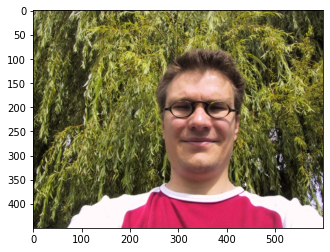

In [7]:
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

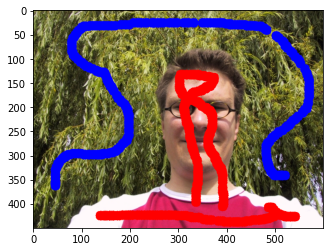

In [8]:
plt.imshow(cv2.cvtColor(img_s, cv2.COLOR_BGR2RGB))

## Funciones a optimizar

In [0]:
def _get_hc_c(h):
    b1, b2, b3 = h.shape
    hc_c = [
          (h[i][j][k], np.array([i,j,k]))
          for i in range(b1)
          for j in range(b2)
          for k in range(b3)
    ]
    return hc_c


hc_c0 = _get_hc_c(h_0)
hc_c1 = _get_hc_c(h_1)


def f(x1, x2, hc_c, sigma=0.1):
    if len(x1.shape) == 1:
        alpha = x1
        mu = x2
    else:
        alpha = x2
        mu = x1

    ans = 0.0
    for h_c, c in hc_c:
        sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
        ans += (h_c - sum2)**2
    return ans


def f_grad_alpha(alpha, mu, hc_c, sigma=0.1):
    grad = np.zeros(alpha.shape)

    for k in range(grad.shape[0]):
        sum1 = 0.0
        for h_c, c in hc_c:
            sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
            e_k = np.exp(-(np.linalg.norm(c - mu[k])**2) / (2*sigma**2))
            sum1 +=  (h_c - sum2) * e_k
        grad[k] = -2 * sum1

    return grad


def f_grad_mu(mu, alpha, hc_c, sigma=0.1):
    grad = np.zeros(mu.shape)    

    for k in range(grad.shape[0]):
        sum1 = 0.0
        for h_c, c in hc_c:
            sum2 = np.sum(alpha * np.exp(-(np.linalg.norm(c - mu, axis=1)**2) / (2*sigma**2)))
            e_k = np.exp(-(np.linalg.norm(c - mu[k])**2) / (2*sigma**2))
            sum1 += (h_c - sum2) * (alpha[k] * e_k * (c - mu[k]))
        grad[k] = -2 * sum1 / sigma**2
    
    return grad
    # return grad.reshape((grad.shape[0] * grad.shape[1]))


In [10]:
n = 30

alpha = np.ones(n)
mu = np.ones((n, 3))

f(alpha, mu, hc_c0, sigma=0.1), f(alpha, mu, hc_c1, sigma=0.1)

(56907555.0, 150757010.0)

In [11]:
f_grad_alpha(alpha, mu, hc_c0, sigma=0.1), f_grad_alpha(alpha, mu, hc_c1, sigma=0.1)

(array([-2162., -2162., -2162., -2162., -2162., -2162., -2162., -2162.,
        -2162., -2162., -2162., -2162., -2162., -2162., -2162., -2162.,
        -2162., -2162., -2162., -2162., -2162., -2162., -2162., -2162.,
        -2162., -2162., -2162., -2162., -2162., -2162.]),
 array([-2448., -2448., -2448., -2448., -2448., -2448., -2448., -2448.,
        -2448., -2448., -2448., -2448., -2448., -2448., -2448., -2448.,
        -2448., -2448., -2448., -2448., -2448., -2448., -2448., -2448.,
        -2448., -2448., -2448., -2448., -2448., -2448.]))

In [12]:
f_grad_mu(mu, alpha, hc_c0, sigma=0.1), f_grad_mu(mu, alpha, hc_c1, sigma=0.1)

(array([[ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17,  1.92874985e-18, -1.00873617e-16],
        [ 3.86521470e-17

## Dogleg

In [0]:
 # Stop criterias
stop_x = lambda x_k, x_k_next: np.linalg.norm(x_k_next - x_k) / max(np.linalg.norm(x_k), 1.0)
stop_f = lambda f_x_k, f_x_k_next: np.abs(f_x_k_next - f_x_k) / max(np.abs(f_x_k), 1.0)
stop_g = lambda grad_k: np.linalg.norm(grad_k)


def dogleg( X: np.array,
            f: Callable[[np.array], np.array],
            g: Callable[[np.array], np.array],
            H: Callable[[np.array], np.array],
            tol_x: float=1e-12,
            tol_g: float=1e-12,
            tol_f: float=1e-12,
            mxitr: int=100,
            **kwargs):
    Result = namedtuple('Result', 'x_log f_log g_norm_log')

    # History of values computed

    x_log = []
    f_log = []
    g_norm_log = []

    x_k_prev = None;
    x_k = X;
    x_log.append(x_k)

    f_k = f(x_k, **kwargs.get('f_kwargs', {}))
    f_log.append(f_k)

    g_k_prev = None
    g_k = g(x_k)
    g_norm_log.append(np.linalg.norm(g_k))

    b_k = H(x_k, **kwargs.get('H_kwargs', {}))

    delta_k = kwargs.get('delta', 1e-2)
    delta_max = kwargs.get('delta_max', 1e-2)
    eta = kwargs.get('eta', 0.25)

    k = 0
    alpha_k = kwargs.get('alpha', 1e-2)

    while np.linalg.norm(g_k) > tol_g and k < mxitr:
        # compute p_k
        if len(g_k.shape) > 1:
            p_ku = - np.trace(g_k.dot(g_k)) / np.trace(g_k @ b_k @ g_k) * g_k
            p_kb = - np.linalg.inv(b_k) @ g_k
        else:
            p_ku = - g_k.dot(g_k) / (g_k @ b_k @ g_k) * g_k
            p_kb = - np.linalg.inv(b_k) @ g_k

        if np.linalg.norm(p_kb) <= np.linalg.norm(delta_k):
            p_k = p_kb # optimal p_k
        else:
            # Find tau that interset with the confidence region
            if np.linalg.norm(p_ku) >= delta_k:
                # Intersection with p_ku
                tau_k = delta_k / np.linalg.norm(p_ku) 
            else:
                # Intersection with p_kb
                a = np.linalg.norm(p_kb - p_ku) ** 2
                b = 2 * p_kb.dot(p_kb - p_ku)
                c = np.linalg.norm(p_ku)**2 - delta_k**2

                lambda_k = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a), (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
                tau_k = lambda_k[0] + 1, lambda_k[1] + 1
                tau_k = tau_k[0] if tau_k[0] >= 1 and tau_k[0] <= 2.0 else tau_k[1]

            if 0 <= tau_k and tau_k <= 1.0:
                p_k = tau_k * p_ku
            elif 1.0 < tau_k and tau_k <= 2.0:
                p_k = p_ku + (tau_k - 1.0) * (p_kb - p_ku)
            else:
                pass
        
        # Compute ro_k to increase o decrease the confidence region
        m_kp = f_k + g_k.dot(p_k)
        ro_k = (f_k - f(x_k + p_k)) / (f_k - m_kp)

        if ro_k < 0.25:
            delta_k = 0.25 * delta_k
        else:
            if ro_k > 0.75 and np.linalg.norm(p_k) == delta_k:
                delta_k = min(2.0 * delta_k, delta_max)
            else:
                pass

        if ro_k <= eta:
            continue
        
        # Update x
        x_k_prev = x_k
        x_k = x_k_prev + p_k
        x_log.append(x_k)

        f_k = f(x_k, **kwargs.get('f_kwargs', {}))
        f_log.append(f_k)

        g_k_prev = g_k
        g_k = g(x_k, **kwargs.get('g_kwargs', {}))
        g_norm_log.append(np.linalg.norm(g_k))

        b_k = H(x_k, **kwargs.get('H_kwargs', {}))

        # Stop criteria
        if stop_x(x_log[-2], x_log[-1]) <= tol_x or stop_f(f_log[-2], f_log[-1]) <= tol_f:
            break

        k += 1

    return Result(np.array(x_log), np.array(f_log), np.array(g_norm_log))


## Barzilai Borwein

In [0]:
stop_x = lambda x_k, x_k_next: np.linalg.norm(x_k_next - x_k) / max(np.linalg.norm(x_k), 1.0)
stop_f = lambda f_x_k, f_x_k_next: np.abs(f_x_k_next - f_x_k) / max(np.abs(f_x_k), 1.0)
stop_g = lambda grad_k: np.linalg.norm(grad_k)


def barzilai_borwein(X: np.array,
                     f: Callable[[np.array], np.array],
                     g: Callable[[np.array], np.array],
                     tol_x: float=1e-12,
                     tol_g: float=1e-12,
                     tol_f: float=1e-12,
                     mxitr: int=100,
                     **kwargs):
    Result = namedtuple('Result', 'x_log f_log g_norm_log')

    x_log = []
    f_log = []
    g_norm_log = []

    x_k_prev = None; 
    x_k = X;
    x_log.append(x_k)

    g_k_prev = None
    g_k = g(x_k, **kwargs.get('g_kwargs', {}))
    g_norm_log.append(np.linalg.norm(g_k))

    f_k = f(x_k, **kwargs.get('f_kwargs', {}))
    f_log.append(f_k)

    k = 0
    alpha_k = kwargs.get('alpha', 1e-2)
    
    while np.linalg.norm(g_k) > tol_g and k < mxitr:
    # while k < mxitr:
        if k != 0:
            s_k1 = x_k - x_k_prev
            y_k1 = g_k - g_k_prev
            #print(len(y_k1.shape))
            if len(y_k1.shape) != 1:
                s_k1 = s_k1.reshape((s_k1.shape[0] * s_k1.shape[1]))
                y_k1 = y_k1.reshape((y_k1.shape[0] * y_k1.shape[1]))
            alpha_k = np.dot(s_k1, y_k1) / np.dot(y_k1, y_k1)
        
        x_k_prev = x_k.copy()
        x_k = x_k_prev - alpha_k * g_k
        x_log.append(x_k)

        g_k_prev = g_k
        g_k = g(x_k, **kwargs.get('g_kwargs', {}))
        g_norm_log.append(np.linalg.norm(g_k))

        f_k = f(x_k, **kwargs.get('f_kwargs', {}))
        f_log.append(f_k)
        # if k%100 == 0:
        # print(k, f_k, g_norm_log[-1])

        # Stop criteria
        if stop_x(x_log[-2], x_log[-1]) <= tol_x or stop_f(f_log[-2], f_log[-1]) <= tol_f:
           break

        k += 1

    return Result(x_log, f_log, g_norm_log)


### Optimization

In [0]:
def optimization(ALPHA, 
                 MU,
                 hc_c,
                 sigma=0.1,
                 iters=100,
                 **kwargs):
    f_k = f(ALPHA, MU, hc_c, sigma=sigma)
    f_prev = f_k + 2000
    
    tol_f = kwargs.get('tol_f', 1e-12)

    k = 0
    f_log = []
    g_log = []
    # while stop_f(f_prev, f_k) > tol_f:
    while k < iters:
        params_alpha = {
            'X': ALPHA,
            'f': f,
            'f_kwargs': {
                'x2': MU,
                'hc_c': hc_c,
                'sigma': sigma
            },
            'g': f_grad_alpha,
            'g_kwargs': {
                'mu': MU,
                'hc_c': hc_c,
                'sigma': sigma
            },
            **kwargs
        }
        if k%100 == 0:
            print("opti alpha")
        ans = barzilai_borwein(**params_alpha)
        ALPHA = ans.x_log[-1]
        f_log += ans.f_log
        g_log += ans.g_norm_log

        params_mu = {
            'X': MU,
            'f': f,
            'f_kwargs': {
                'x2': ALPHA,
                'hc_c': hc_c,
                'sigma': sigma
            },
            'g': f_grad_mu,
            'g_kwargs': {
                'alpha': ALPHA,
                'hc_c': hc_c,
                'sigma': sigma
            },
            **kwargs
        }
        if k%100 == 0:
            print("opti mu")
        ans = barzilai_borwein(**params_mu)
        f_log += ans.f_log
        g_log += ans.g_norm_log
        MU = ans.x_log[-1]

        f_prev = f_k
        f_k = f(ALPHA, MU, hc_c, sigma=sigma)
        if k%100 == 0:
            print(f_k)
        k += 1

    return ALPHA, MU, f_log, g_log

In [16]:
n = radial_size
ALPHA1 = np.random.sample(n)
MU1 = np.random.sample((n, 3))

# ALPHA1 = np.zeros(n, dtype=np.float128)
# MU1 = np.zeros((n, 3), dtype=np.float128)

params = {
    'tol_x': 1e-12,
    'tol_f': 1e-12,
    'tol_g': 1e-12,
    'alpha': 1e-2,
    'mxitr': 200
}

alpha1, mu1, f_log_1, g_log_1 = optimization(ALPHA1, MU1, hc_c0, sigma=SIGMA, iters=1000, **params)

opti alpha
opti mu
56973315.000339975857
opti alpha
opti mu
56973314.999772086052
opti alpha
opti mu
56973314.998922789982
opti alpha
opti mu
56973314.999932883737
opti alpha
opti mu
56973314.99984936547
opti alpha
opti mu
56973314.999746445617
opti alpha
opti mu
56973314.99956062274
opti alpha
opti mu
56973314.998803565417
opti alpha
opti mu
56973314.99956007486
opti alpha
opti mu
56973314.99883057802


In [17]:
n = radial_size

ALPHA2 = np.random.sample(n)
MU2 = np.random.sample((n, 3))

# ALPHA2 = np.ones(n, dtype=np.float128)
# MU2 = np.ones((n, 3), dtype=np.float128)

params = {
    'tol_x': 1e-12,
    'tol_f': 1e-12,
    'tol_g': 1e-12,
    'alpha': 1e-2,
    'mxitr': 200
}

alpha2, mu2, f_log_2, g_log_2 = optimization(ALPHA2, MU2, hc_c1, sigma=SIGMA, iters=1000, **params)

opti alpha
opti mu
150714355.28154626062
opti alpha
opti mu
150831348.99741084763
opti alpha
opti mu
150831348.99753076563
opti alpha
opti mu
150831348.99476758156
opti alpha
opti mu
150831348.99551554273
opti alpha
opti mu
150831348.99830604742
opti alpha
opti mu
150831348.99834656208
opti alpha
opti mu
150831348.99760501424
opti alpha
opti mu
150831348.99631126919
opti alpha
opti mu
150831348.99605066021


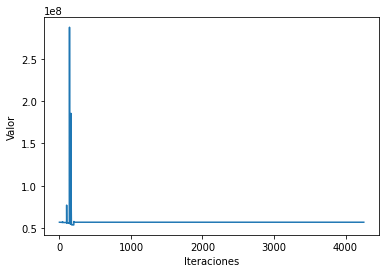

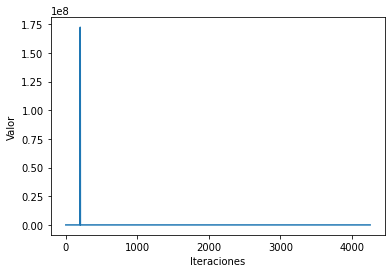

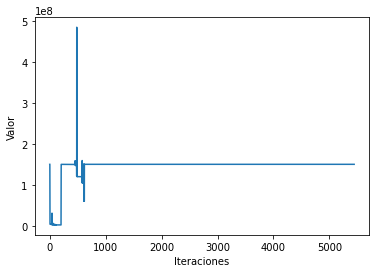

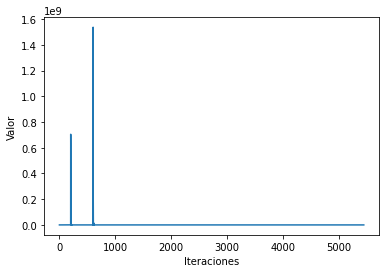

In [18]:
def plot_log(log):
    plt.plot(log)
    plt.xlabel('Iteraciones')
    plt.ylabel('Valor')
    plt.show()

plot_log(f_log_1)
plot_log(g_log_1)
plot_log(f_log_2)
plot_log(g_log_2)

## Segmentation

### con F

#### Colorear

In [0]:
RED = 1
BLUE = 2

def rgb_to_c(rgb, num_bins):
    x = int(rgb[0] / 256.0 * num_bins)
    y = int(rgb[1] / 256.0 * num_bins)
    z = int(rgb[2] / 256.0 * num_bins)
    return np.array([x, y, z])


def __f(alpha, mu, c, sigma):
    exp =  np.exp(-np.linalg.norm(c - mu, axis=1)**2 / (2*sigma**2))
    s = alpha * exp
    return np.sum(s)

def __F1(c, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    t1 = (__f(alpha1, mu1, c, sigma=sigma) + eps)
    t2 = (__f(alpha1, mu1, c, sigma=sigma) + __f(alpha2, mu2, c, sigma=sigma) + 2 * eps)
    return t1/t2


def __F2(c, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    t1 = (__f(alpha2, mu2, c, sigma=sigma) + eps)
    t2 = (__f(alpha1, mu1, c, sigma=sigma) + __f(alpha2, mu2, c, sigma=sigma) + 2 * eps)
    return t1/t2


def get_c_label(c, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    f1 = __F1(c, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
    f2 = __F2(c, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
    return BLUE if f1 < f2 else RED


def get_c_labels(nbins, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    labels = np.zeros((nbins, nbins, nbins), dtype=int)
    l = m = n = nbins
    for i in range(l):
        for j in range(m):
            for k in range(n):
                c = np.array([i,j,k])
                label = get_c_label(c, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
                # print(label, labels.shape)
                labels[i][j][k] = label
    return labels


def img_segm(img, nbins, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=0.1):
    labels = get_c_labels(nbins, alpha1, mu1, alpha2, mu2, eps=eps, sigma=sigma)
    shape = img.shape
    print(shape)
    img_seg = img.copy()
    print(img_seg.shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            c = rgb_to_c(img[i][j], nbins)
            label = labels[c[0], c[1], c[2]]
            img_seg[i][j][0] = 255 if label == RED else 0
            img_seg[i][j][1] = 0
            img_seg[i][j][2] = 255 if label == BLUE else 0
    return img_seg



#### Draw

In [0]:
def plot_2img(img1, img2, t1='', t2=''):
    fig=plt.figure(figsize=(8, 8))
    rows = 1
    columns= 2
    ax1 = fig.add_subplot(rows, columns, 1)
    ax1.set_title(t1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax2 = fig.add_subplot(rows, columns, 2)
    ax2.set_title(t2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()

(450, 600, 3)
(450, 600, 3)


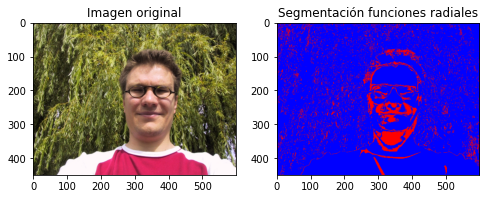

In [21]:
img2 = img_segm(img, NBINS, alpha1, mu1, alpha2, mu2, eps=0.01, sigma=SIGMA)

plot_2img(img, img2, t1='Imagen original', t2='Segmentación funciones radiales')

### Con H

#### Colorear

In [0]:
def __H1(h1, h2, c, eps=0.001):
    #print(c, h1.shape, h2.shape)
    t1 = h1[c[0]][c[1]][c[2]] + eps
    t2 = h1[c[0]][c[1]][c[2]] + h2[c[0]][c[1]][c[2]] + 2*eps
    return t1/t2

def __H2(h1, h2, c, eps=0.001):
    t1 = h2[c[0]][c[1]][c[2]] + eps
    t2 = h1[c[0]][c[1]][c[2]] + h2[c[0]][c[1]][c[2]] + 2*eps
    return t1/t2


def get_c_label_h(c, hist_0, hist_1):
    h1 = __H1(hist_0, hist_1, c)
    h2 = __H2(hist_0, hist_1, c)
    return BLUE if h1 < h2 else RED


def get_c_labels_h(nbins, hist_0, hist_1):
    labels = np.zeros((nbins, nbins, nbins), dtype=int)
    l = m = n = nbins
    for i in range(l):
        for j in range(m):
            for k in range(n):
                c = np.array([i,j,k])
                label = get_c_label_h(c, hist_0, hist_1)
                # print(label, labels.shape)
                labels[i][j][k] = label
    return labels


def img_segm_h(img, nbins, hist_1, hist_2):
    labels = get_c_labels_h(nbins, hist_1, hist_2)
    shape = img.shape
    print(shape)
    img_seg = img.copy()
    print(img_seg.shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            c = rgb_to_c(img[i][j], nbins)
            label = labels[c[0], c[1], c[2]]
            img_seg[i][j][0] = 255 if label == BLUE else 0
            img_seg[i][j][1] = 0
            img_seg[i][j][2] = 255 if label == RED else 0
    return img_seg



#### Draw

(450, 600, 3)
(450, 600, 3)


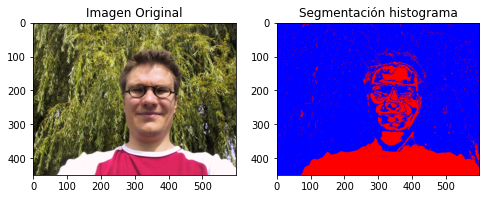

In [23]:
img3 = img_segm_h(img, NBINS, h_0, h_1)

plot_2img(img, img3, t1='Imagen Original', t2='Segmentación histograma')

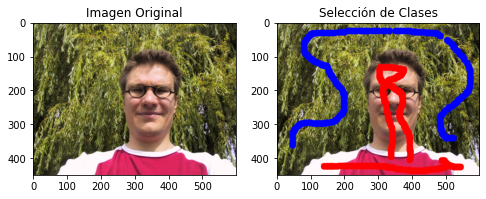

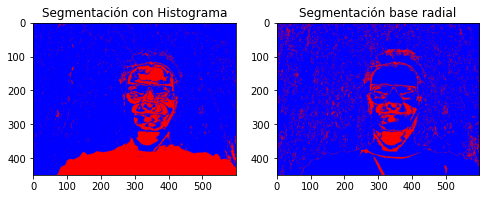

In [24]:
plot_2img(img, img_s, t1='Imagen Original', t2='Selección de Clases')
plot_2img(img3, img2, t1='Segmentación con Histograma', t2='Segmentación base radial')